In [1]:
#Importing
import numpy as np
import pandas as pd 
import seaborn as sns 
from functools import reduce
import matplotlib.pyplot as plt
import altair as alt

In [2]:
#Importing the dataset and starting EDA
manager_survey = pd.read_csv('manager_survey_data.csv',  sep = ',')
general_data = pd.read_csv('general_data.csv',  sep = ',')
employee_data = pd.read_csv('employee_survey_data.csv',  sep = ',')

In [3]:
manager_survey.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [4]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [5]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [6]:
#Merging and cleaning data
emp_man = pd.merge(manager_survey, employee_data, on='EmployeeID')
data_hr = pd.merge(emp_man, general_data, on='EmployeeID')

data_hr.head()
data_hr.dropna(inplace=True)
data_hr.isnull().sum()
data_hr.drop(['Over18', 'EmployeeCount', 'StandardHours'], inplace=True, axis=1)

### Changing Datatypes

In [7]:

data_hr = data_hr.astype({'EnvironmentSatisfaction':'int64','JobSatisfaction':'int64','WorkLifeBalance':'int64','NumCompaniesWorked':'int64'})
data_hr['Attrition'] = data_hr['Attrition'].replace(['Yes'],True)
data_hr['Attrition'] = data_hr['Attrition'].replace(['No'],False)

In [8]:
data_hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4300 non-null   int64  
 1   JobInvolvement           4300 non-null   int64  
 2   PerformanceRating        4300 non-null   int64  
 3   EnvironmentSatisfaction  4300 non-null   int64  
 4   JobSatisfaction          4300 non-null   int64  
 5   WorkLifeBalance          4300 non-null   int64  
 6   Age                      4300 non-null   int64  
 7   Attrition                4300 non-null   bool   
 8   BusinessTravel           4300 non-null   object 
 9   Department               4300 non-null   object 
 10  DistanceFromHome         4300 non-null   int64  
 11  Education                4300 non-null   int64  
 12  EducationField           4300 non-null   object 
 13  Gender                   4300 non-null   object 
 14  JobLevel                

## General EDA

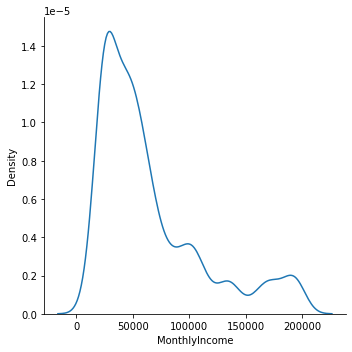

In [9]:
sns.displot(data=data_hr, 
            x="MonthlyIncome",
            kind="kde")

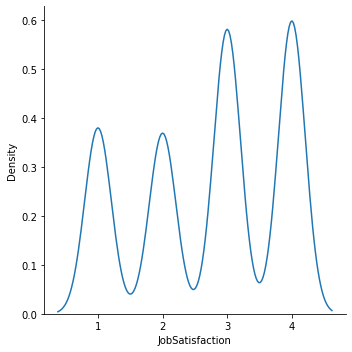

In [10]:
sns.displot(data=data_hr, 
            x="JobSatisfaction",
            kind="kde")

Department
Human Resources           58114.784946
Research & Development    67272.810830
Sales                     61295.485845
Name: MonthlyIncome, dtype: float64

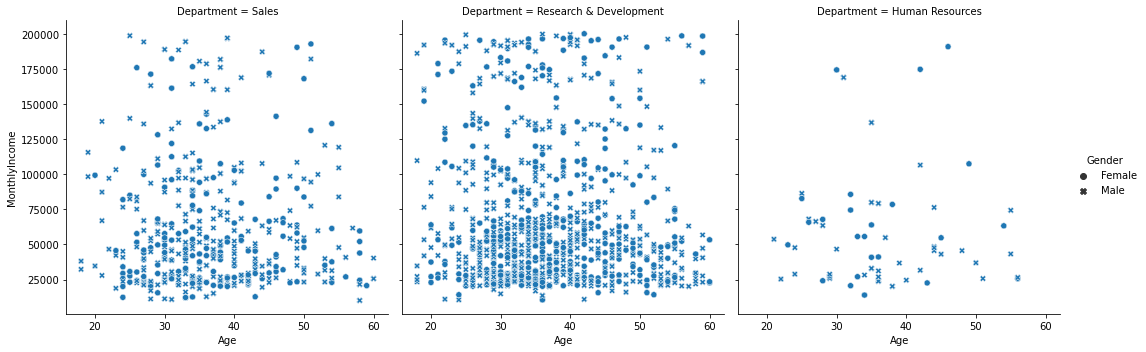

In [11]:
sns.relplot(data=data_hr, 
            x="Age", 
            y="MonthlyIncome",
            kind="scatter",
            col='Department',
            style= 'Gender')

data_hr.groupby('Department').MonthlyIncome.mean()

In [12]:
data_hr.groupby('Attrition').Age.mean()

Attrition
False    37.551734
True     33.686331
Name: Age, dtype: float64

In [13]:
data_hr.groupby('Attrition').JobSatisfaction.mean()

Attrition
False    2.774757
True     2.466187
Name: JobSatisfaction, dtype: float64

In [14]:
data_hr.groupby('Department').JobSatisfaction.mean()

Department
Human Resources           2.693548
Research & Development    2.703598
Sales                     2.775057
Name: JobSatisfaction, dtype: float64

In [15]:
data_hr.head()

EmployeeID  JobInvolvement  PerformanceRating  EnvironmentSatisfaction  \
0           1               3                  3                        3   
1           2               2                  4                        3   
2           3               3                  3                        2   
3           4               2                  3                        4   
4           5               3                  3                        4   

   JobSatisfaction  WorkLifeBalance  Age  Attrition     BusinessTravel  \
0                4                2   51      False      Travel_Rarely   
1                2                4   31       True  Travel_Frequently   
2                2                1   32      False  Travel_Frequently   
3                4                3   38      False         Non-Travel   
4                1                3   32      False      Travel_Rarely   

               Department  ...  MaritalStatus  MonthlyIncome  \
0                   Sales  ...        Married         131160   
1  Research & Development  ...         Single          41890   
2  Research & Development  ...        Married         193280   
3  Research & Development  ...        Married          83210   
4  Research & Development  ...         Single          23420   

  NumCompaniesWorked PercentSalaryHike  StockOptionLevel TotalWorkingYears  \
0                  1                11                 0               1.0   
1                  0                23                 1               6.0   
2                  1                15                 3               5.0   
3                  3                11                 3              13.0   
4                  4                12                 2               9.0   

  TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                     6               1                        0   
1                     3               5                        1   
2                     2               5                        0   
3                     5               8                        7   
4                     2               6                        0   

   YearsWithCurrManager  
0                     0  
1                     4  
2                     3  
3                     5  
4                     4  

[5 rows x 26 columns]

In [16]:
data_hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4300 non-null   int64  
 1   JobInvolvement           4300 non-null   int64  
 2   PerformanceRating        4300 non-null   int64  
 3   EnvironmentSatisfaction  4300 non-null   int64  
 4   JobSatisfaction          4300 non-null   int64  
 5   WorkLifeBalance          4300 non-null   int64  
 6   Age                      4300 non-null   int64  
 7   Attrition                4300 non-null   bool   
 8   BusinessTravel           4300 non-null   object 
 9   Department               4300 non-null   object 
 10  DistanceFromHome         4300 non-null   int64  
 11  Education                4300 non-null   int64  
 12  EducationField           4300 non-null   object 
 13  Gender                   4300 non-null   object 
 14  JobLevel                

## Correlation Matrix

<AxesSubplot:>

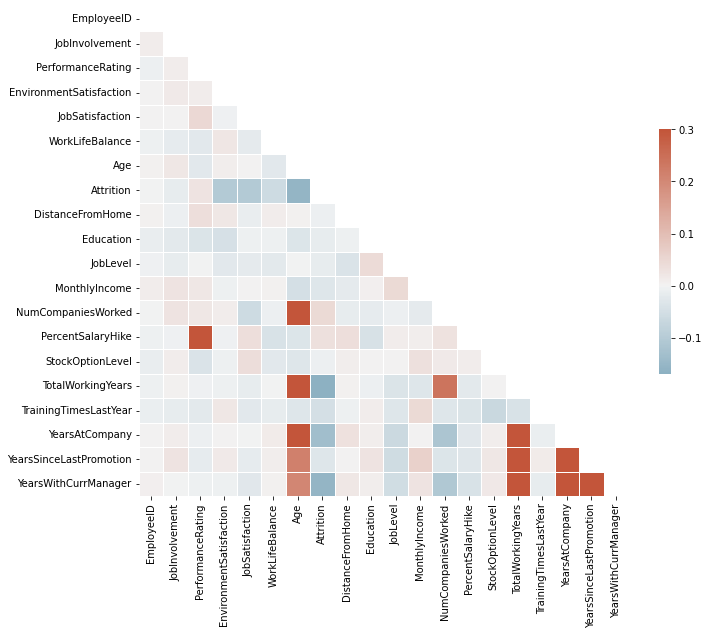

In [17]:
#quick correlation check

# Compute the correlation matrix
corr = data_hr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## UML

In [18]:
print(data_hr)

      EmployeeID  JobInvolvement  PerformanceRating  EnvironmentSatisfaction  \
0              1               3                  3                        3   
1              2               2                  4                        3   
2              3               3                  3                        2   
3              4               2                  3                        4   
4              5               3                  3                        4   
...          ...             ...                ...                      ...   
4404        4405               2                  3                        3   
4405        4406               3                  3                        4   
4406        4407               2                  3                        4   
4407        4408               3                  4                        1   
4408        4409               2                  3                        4   

      JobSatisfaction  WorkLifeBalance 

In [19]:
#Making a dataframe with no text for UML model
data_to_cluster = data_hr[['Attrition', 'JobSatisfaction', 'EmployeeID', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'WorkLifeBalance', 'Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [20]:
data_to_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                4300 non-null   bool   
 1   JobSatisfaction          4300 non-null   int64  
 2   EmployeeID               4300 non-null   int64  
 3   StockOptionLevel         4300 non-null   int64  
 4   TotalWorkingYears        4300 non-null   float64
 5   TrainingTimesLastYear    4300 non-null   int64  
 6   YearsAtCompany           4300 non-null   int64  
 7   JobInvolvement           4300 non-null   int64  
 8   PerformanceRating        4300 non-null   int64  
 9   EnvironmentSatisfaction  4300 non-null   int64  
 10  WorkLifeBalance          4300 non-null   int64  
 11  Age                      4300 non-null   int64  
 12  DistanceFromHome         4300 non-null   int64  
 13  Education                4300 non-null   int64  
 14  JobLevel                

In [21]:
#Importing UML packages
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
# learn x-y relationships (principal components) and transform
data_to_cluster_scaled = scaler.fit_transform(data_to_cluster)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler_min_max = MinMaxScaler()

In [24]:
data_to_cluster_minmax = scaler_min_max.fit_transform(data_to_cluster)

In [25]:
data_to_cluster

Attrition  JobSatisfaction  EmployeeID  StockOptionLevel  \
0         False                4           1                 0   
1          True                2           2                 1   
2         False                2           3                 3   
3         False                4           4                 3   
4         False                1           5                 2   
...         ...              ...         ...               ...   
4404      False                4        4405                 0   
4405      False                1        4406                 1   
4406      False                4        4407                 0   
4407      False                3        4408                 0   
4408      False                1        4409                 1   

      TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                   1.0                      6               1   
1                   6.0                      3               5   
2                   5.0                      2               5   
3                  13.0                      5               8   
4                   9.0                      2               6   
...                 ...                    ...             ...   
4404                6.0                      2               6   
4405               10.0                      5               3   
4406               10.0                      2               3   
4407                5.0                      4               4   
4408               10.0                      2               9   

      JobInvolvement  PerformanceRating  EnvironmentSatisfaction  \
0                  3                  3                        3   
1                  2                  4                        3   
2                  3                  3                        2   
3                  2                  3                        4   
4                  3                  3                        4   
...              ...                ...                      ...   
4404               2                  3                        3   
4405               3                  3                        4   
4406               2                  3                        4   
4407               3                  4                        1   
4408               2                  3                        4   

      WorkLifeBalance  Age  DistanceFromHome  Education  JobLevel  \
0                   2   51                 6          2         1   
1                   4   31                10          1         1   
2                   1   32                17          4         4   
3                   3   38                 2          5         3   
4                   3   32                10          1         1   
...               ...  ...               ...        ...       ...   
4404                3   29                 4          3         2   
4405                3   42                 5          4         1   
4406                3   29                 2          4         1   
4407                3   25                25          2         2   
4408                3   42                18          2         1   

      MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
0            131160                   1                 11   
1             41890                   0                 23   
2            193280                   1                 15   
3             83210                   3                 11   
4             23420                   4                 12   
...             ...                 ...                ...   
4404          35390                   1                 18   
4405          60290                   3                 17   
4406          26790                   2                 15   
4407          37020                   0                 20   
4408          23980                   0                 14   

      YearsSinceLastPromotion

### PCA

In [26]:
# load up and instantiate PCS
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [27]:
# fit-transform the data
data_reduced_pca = pca.fit_transform(data_to_cluster_scaled)

In [28]:
print(pca.components_)

[[-0.14113709 -0.00805728  0.00254629  0.00578687  0.47787794 -0.01535926
   0.50686796  0.01484017 -0.03080998  0.01145233  0.00736065  0.34678694
   0.01370638  0.00173186 -0.04786435  0.00347466  0.04565469 -0.04577035
   0.40496751  0.44963228]
 [ 0.04032638  0.06823128 -0.01921841 -0.00602738  0.05078764 -0.04783052
   0.02234394  0.00910209  0.6953822   0.00294883 -0.05403798  0.03188078
   0.07281694 -0.07700311 -0.00669488  0.01611619  0.07179463  0.69533487
   0.01108217  0.00758719]]


In [29]:
pca.components_.shape

(2, 20)

In [30]:
print(pca.explained_variance_ratio_)

[0.15132983 0.08952617]


In [31]:
#sns.scatterplot(data_reduced_pca[:,0],data_reduced_pca[:,2])

In [34]:
vis_data = pd.DataFrame(data_reduced_pca)
vis_data['EmployeeID'] = data_hr['EmployeeID']
vis_data['Department'] = data_hr['Department']
vis_data.columns = ['x', 'y', 'EmployeeID', 'Department']

In [35]:
# alt.Chart(vis_data).mark_circle(size=60).encode(
#     x='x',
#     y='y',
#     tooltip=['EmployeeID', 'Department']
# ).interactive()

<AxesSubplot:>

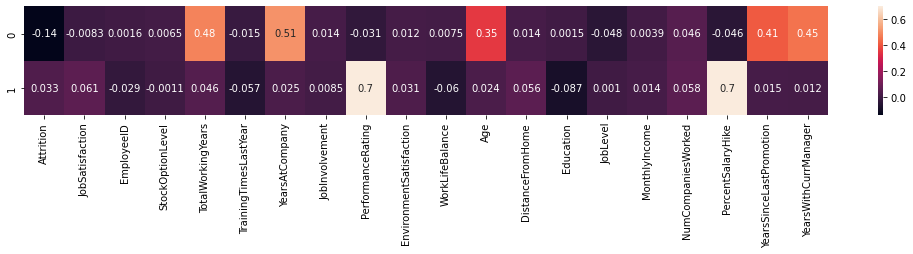

In [36]:
plt.figure(figsize=(18,2))
sns.heatmap(pd.DataFrame(pca.components_, columns=data_to_cluster.columns), annot=True)

### NMF

In [111]:
# import nmf
from sklearn.decomposition import NMF

In [112]:
# instantiate with 4 components
nmf = NMF(n_components=4)

In [113]:
# notice, we are using the min-max scaled data
data_reduced_nmf = nmf.fit_transform(data_to_cluster_minmax)

/home/vdr/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/home/vdr/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [114]:
data_reduced_nmf.shape

(4300, 4)

In [115]:
nmf.components_.shape

(4, 20)

In [116]:
plt.figure(figsize=(20,3))
sns.heatmap(pd.DataFrame(nmf.components_, columns=data_to_cluster.columns), annot=True)

<AxesSubplot:>

### Modern Algorithms

In [35]:
import umap

In [36]:
# we totally could specify more than 2 dimensions (as well as some other parameters)
umap_scaler = umap.UMAP()

In [37]:
# umap accepts standard-scaled data
embeddings = umap_scaler.fit_transform(data_to_cluster_scaled)

In [38]:
#sns.scatterplot(embeddings[:,0],embeddings[:,1])

In [39]:
vis_data = pd.DataFrame(embeddings)
vis_data['EmployeeID'] = data_hr['EmployeeID']
vis_data['Department'] = data_hr['Department']
vis_data.columns = ['x', 'y', 'EmployeeID', 'Department']

In [40]:
alt.Chart(vis_data).mark_circle(size=60).encode(
    x='x',
    y='y',
    tooltip=['EmployeeID', 'Department']
).interactive()

alt.Chart(...)

In [41]:
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=3)

In [42]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_to_cluster_scaled)
    Sum_of_squared_distances.append(km.inertia_)

In [43]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

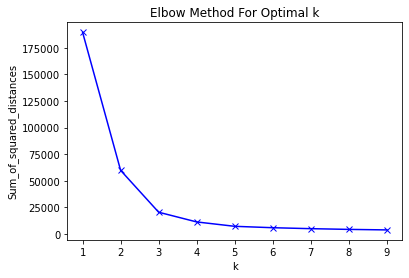

In [44]:
umap_scaler_km = umap.UMAP(n_components=6)
embeddings_km = umap_scaler.fit_transform(data_to_cluster_scaled)


Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(embeddings_km)
    Sum_of_squared_distances.append(km.inertia_)


plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [188]:
# back to our k-means instance. We take 3 clusters on non-reduced data
clusterer = KMeans(n_clusters=3, random_state=0, n_init=10)
label = clusterer.fit_predict(embeddings)
centroids = clusterer.cluster_centers_

vis_data = pd.DataFrame(embeddings)
vis_data['EmployeeID'] = data_hr['EmployeeID']
vis_data['Department'] = data_hr['Department']
vis_data.columns = ['x', 'y', 'EmployeeID', 'Department']

In [189]:
print(label)
df_t = pd.DataFrame(data=embeddings, columns=['x', 'y'])
df_t['label'] = label
only_0 = df_t[df_t['label'] == 0]
only_1 = df_t[df_t['label'] == 1]
only_2 = df_t[df_t['label'] == 2]

plt.scatter(only_0['x'], only_0['y'], color='blue')
plt.scatter(only_1['x'], only_1['y'], color='red')
plt.scatter(only_2['x'],only_2['y'], color ='green')
df_t.info()
df_t.head()

[2 1 2 ... 2 1 2]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4300 entries, 0 to 4299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       4300 non-null   float32
 1   y       4300 non-null   float32
 2   label   4300 non-null   int32  
dtypes: float32(2), int32(1)
memory usage: 50.5 KB


x          y  label
0  11.284891  12.270415      2
1  -3.291580   8.141849      1
2  12.645128  12.747321      2
3  13.041541  13.061939      2
4  14.405678  10.299563      2

In [190]:
# we can then copy the cluster-numbers into the original file and start exploring
print(labels)
data_hr['cluster'] = labels

[2 1 2 ... 2 1 2]


In [2]:
data_hr.groupby('cluster').JobSatisfaction.mean()

NameError: name 'data_hr' is not defined

In [191]:
vis_data = pd.DataFrame(embeddings)
vis_data['EmployeeID'] = data_hr['EmployeeID']
vis_data['cluster'] = labels
vis_data['Department'] = data_hr['Department']
vis_data.columns = ['x', 'y', 'EmployeeID', 'cluster','Department']
vis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4300 entries, 0 to 4299
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   x           4300 non-null   float32
 1   y           4300 non-null   float32
 2   EmployeeID  4195 non-null   float64
 3   cluster     4300 non-null   int32  
 4   Department  4195 non-null   object 
dtypes: float32(2), float64(1), int32(1), object(1)
memory usage: 117.7+ KB


In [192]:
alt.Chart(vis_data).mark_circle(size=60).encode(
    x='x',
    y='y',
    tooltip=['EmployeeID', 'Department'],
    color = 'cluster:N'
    #color=alt.Color('cluster:N', scale=alt.Scale(scheme='dark2')) #use N after the var to tell altair that it's categorical
).interactive()

alt.Chart(...)